# Tarea 1

In [1]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

## Ejercicio 1

### Método de Euler

In [125]:
def euler(funcion, p_ini, x, h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempos[i])
    return tiempos, y

### Método de integración por serie de Taylor de 2º orden

In [ ]:
def taylor2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange ocupa menos memoria para cualquier for que valga mas de 100
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

### Método de integración de Runge-Kutta de 2º orden

In [ ]:
def RK2(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

### Método de integración de Runge-Kutta de 4º orden

In [126]:
def RK4(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

### Resolviendo un problema particular

Se tiene la siguiente ecuación diferencial que se quiere resolver

\begin{equation}
\ddot x + 0.5\dot x + \sin x = e^{-t}\sin 3t
\end{equation}
Con condiciones iniciales $x(0)=0$ y $\dot x(0)=1$

Que se puede reescribir como un sistema de dos ecuaciones diferenciales de primer orden

\begin{array}
\dot x &=& y\\
\dot y &=& -0.5y - \sin x + e^{-t}\sin 3t = 0
\end{array}

Con condiciones iniciales $x(0)=0$ y $y(0)=1$

In [39]:
def ecdif1(x, t):
    X_prime = x[1]
    Y_prime = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
    return array([X_prime, Y_prime])

#### Con Euler

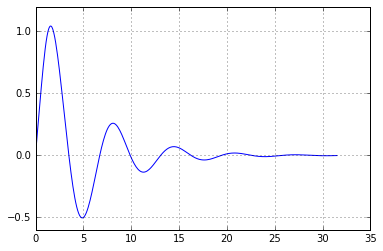

In [121]:
t_euler, sol_euler = euler(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_euler, sol_euler[:,0])
ax.grid(True);

#### Con Taylor de 2º orden

#### Con Runge-Kutta de 2º orden

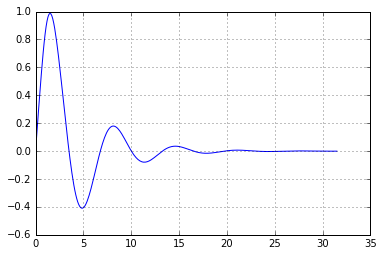

In [122]:
t_rk2, sol_rk2 = RK2(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_rk2, sol_rk2[:,0])
ax.grid(True);

#### Con Runge-Kutta de 4º orden

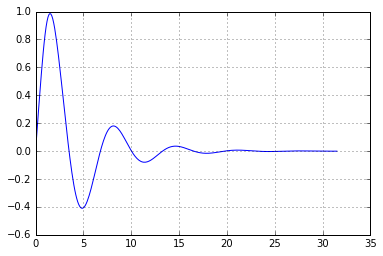

In [123]:
t_rk4, sol_rk4 = RK4(ecdif1, array([0.0, 1.0]), [0, 10*pi], 1.0e-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t_rk4, sol_rk4[:,0])
ax.grid(True);

### Comparación entre los métodos

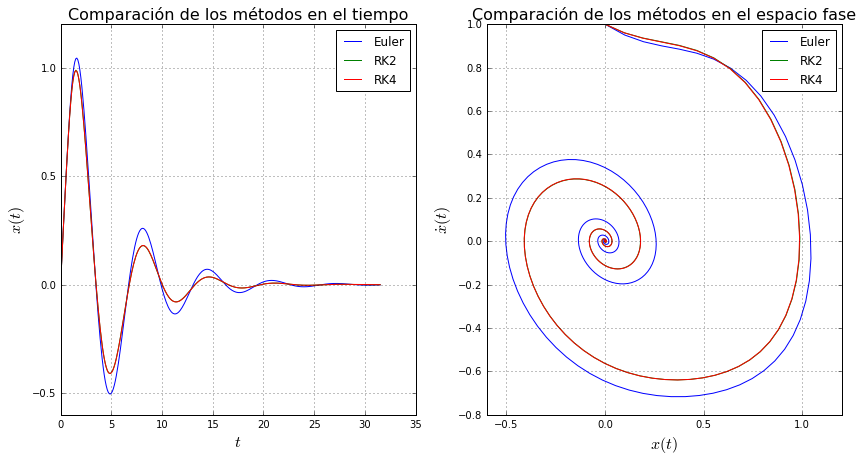

In [124]:
fig = plt.figure(figsize=(14,7))

ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

ax.plot(t_euler, sol_euler[:,0], label="Euler")
ax.plot(t_rk2, sol_rk2[:,0], label="RK2")
ax.plot(t_rk4, sol_rk4[:,0], label="RK4")
ax.set_xlabel("$t$",  fontsize = 16)
ax.set_ylabel("$x(t)$",  fontsize = 16)
ax.set_title(u"Comparación de los métodos en el tiempo", fontsize = 16)
ax.legend(loc='best')
ax.grid(True)

bx.plot(sol_euler[:,0], sol_euler[:,1], label="Euler")
bx.plot(sol_rk2[:,0], sol_rk2[:,1], label="RK2")
bx.plot(sol_rk4[:,0], sol_rk4[:,1], label="RK4")
bx.set_xlabel("$x(t)$", fontsize = 16)
bx.set_ylabel("$\dot x(t)$", fontsize = 16)
bx.set_title(u"Comparación de los métodos en el espacio fase", fontsize = 16)
bx.legend(loc='best')
bx.grid(True);

## Ejercicio 3

In [128]:
def euler_args(funcion, p_ini, x, args, h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    y = zeros((len(tiempos),len(p_ini)))
    y[0,:] = p_ini
    for i in range(len(y)-1):
        y[i+1] = y[i] + h*funcion(y[i], tiempos[i], args)
    return tiempos, y

def RK2_args(ec, p_ini, x, args, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i], args)
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h, args)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

def RK4_args(ec, p_ini, x, args, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

Si consideramos el problema
$$\ddot x + \frac{1}{10}\dot x + 4 \sin x = \frac{1}{2}\sin \omega t$$

Con condiciones iniciales $\dot x(0) = 1$ y $x(0)=0$

Notemos que podemos reescribir el problema como un sistema de dos ecuaciones difereciales de primer orden

\begin{array}
\dot x &=& y\\
\dot y &=& -\frac{1}{10}y - 4 \sin x + \frac{1}{2}\sin \omega t
\end{array}
Con condiciones iniciales $y(0) = 1$ y $x(0)=0$

In [225]:
def ecdif3(x, t, args):
    X_prime = x[1]
    Y_prime = -0.1*x[1] - 4.0*sin(x[0]) + 0.5*sin(args[0]*t)
    return array([X_prime, Y_prime])

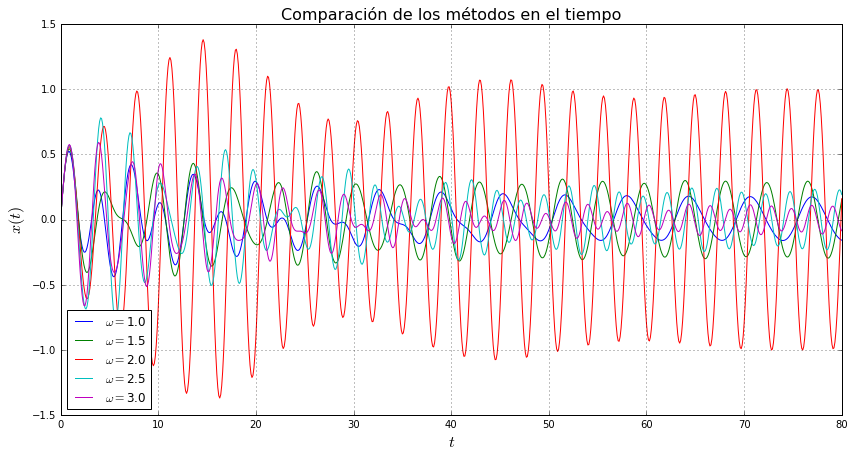

In [323]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

Tmax = 80
epsilon = 0.1

N = 5
omega = [1.0 + (3.0-1.0)*i/(N-1) for i in range(N)]

for i in range(N):
    t_rk4_3, sol_rk4_3 = RK4_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], epsilon)
    ax.plot(t_rk4_3, sol_rk4_3[:,0], label="$\omega =$"+str(omega[i]))

    
ax.set_xlabel("$t$",  fontsize = 16)
ax.set_ylabel("$x(t)$",  fontsize = 16)
ax.set_title(u"Comparación de los métodos en el tiempo", fontsize = 16)
ax.legend(loc='best')
ax.grid(True)

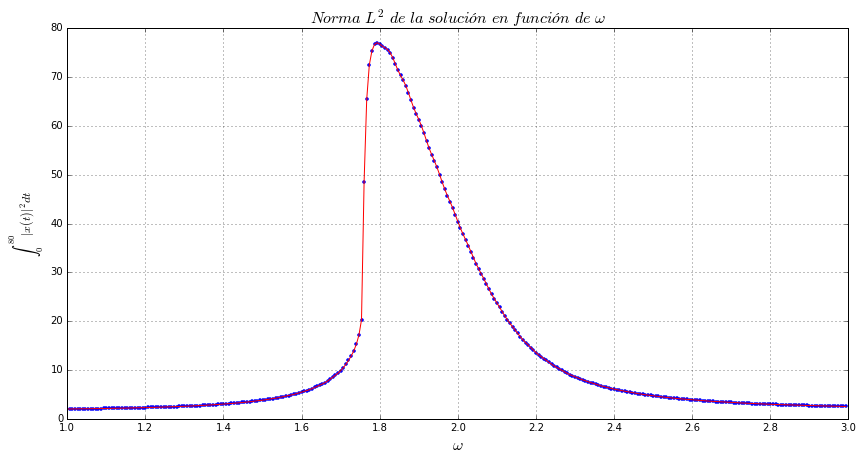

In [325]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

Tmax = 80
epsilon = 0.1
N = 300
omega = [1.0+(3.0-1.0)*i/N for i in range(N)]

for i in range(N):
    t_rk4_3, sol_rk4_3 = RK4_args(ecdif3, array([0.0, 1.0]), [0, Tmax], [omega[i]], epsilon)
    amplitud[i] = [sol_rk4_3[j,0]*sol_rk4_3[j,0] for j in range(len(sol_rk4_3[:,0]))]
    
norma = zeros(N)
for i in range(N):
    for j in range(len(amplitud[i])):
        norma[i] += amplitud[i][j]
    norma[i] = norma[i]*epsilon
        
ax.plot(omega, norma, '.')
ax.plot(omega, norma, 'r')
ax.set_xlabel("$\omega$",  fontsize = 16)
ax.set_ylabel("$\int_{0}^{"+str(Tmax)+"}|x(t)|^2 dt$",  fontsize = 12)
ax.set_title(u"$Norma\ L^2\ de\ la\ solución\ en\ función\ de\ \omega$", fontsize = 16)
ax.set_xticks(arange(1.0, 3.1, 0.2))
ax.grid(True);

## Ejercicio 4

Consideremos el sistema de ecuaciones diferenciales siguiente

\begin{array}{lcl} 
\frac{dx}{dt} &=& 10(y-x) \\
\frac{dy}{dt} &=& x(28-z)-y \\
\frac{dz}{dt} &=& xy - \frac{8}{3}z
\end{array}